In [2]:
import gensim.downloader
model = gensim.downloader.load("glove-wiki-gigaword-50")
model["tower"]

[==================================================] 100.0% 66.0/66.0MB downloaded


array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

In [7]:
model

In [35]:
import gensim.downloader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the GloVe model
model = gensim.downloader.load("glove-wiki-gigaword-50")

# Get a sample of words from the model's vocabulary to fit the PCA
sample_words = list(model.index_to_key[:10000000])  # taking a sample of 1000 words for PCA fitting
vectors = np.array([model[word] for word in sample_words])

# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca.fit(vectors)



PCA(n_components=3)

In [16]:
vector

array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

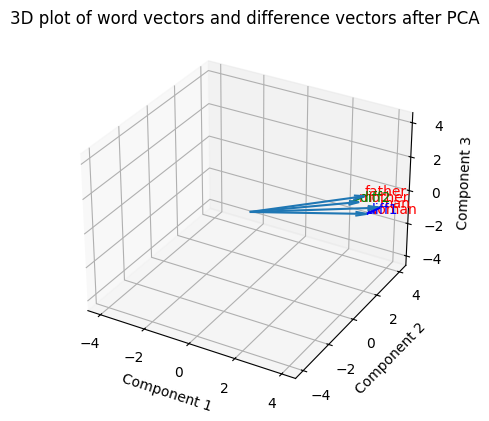

In [60]:
# List of exactly 4 words to transform and plot
words = ["man", "woman", "father", "mother"]

if len(words) != 4:
    raise ValueError("The 'words' list must contain exactly 4 words.")

# Prepare figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Variable to hold maximum absolute value for setting axes limits later
max_val = 0

# Transform and plot each word
reduced_vectors = []
for word in words:
    vector = model[word]
    reduced_vector = pca.transform(vector.reshape(1, -1))[0]
    reduced_vectors.append(reduced_vector)
    
    # Plot the vector from origin to the reduced point using quiver
    ax.quiver(0, 0, 0, reduced_vector[0], reduced_vector[1], reduced_vector[2], 
              label=word, arrow_length_ratio=0.1)
    ax.text(reduced_vector[0], reduced_vector[1], reduced_vector[2], f'{word}', color='red')
    
    # Update max_val for setting axis limits
    max_val = max(max_val, np.max(np.abs(reduced_vector)))

# Calculate and plot difference vectors
diff1 = reduced_vectors[1] - reduced_vectors[0]
diff2 = reduced_vectors[3] - reduced_vectors[2]

# Plot the difference vector from the position of the first word
ax.quiver(reduced_vectors[0][0], reduced_vectors[0][1], reduced_vectors[0][2], 
          diff1[0], diff1[1], diff1[2], color='blue', arrow_length_ratio=0.1)
ax.text(reduced_vectors[0][0] + diff1[0], reduced_vectors[0][1] + diff1[1], reduced_vectors[0][2] + diff1[2], 
        'diff1', color='blue')

# Plot the difference vector from the position of the third word
ax.quiver(reduced_vectors[2][0], reduced_vectors[2][1], reduced_vectors[2][2], 
          diff1[0], diff1[1], diff1[2], color='green', arrow_length_ratio=0.1)
ax.text(reduced_vectors[2][0] + diff2[0], reduced_vectors[2][1] + diff2[1], reduced_vectors[2][2] + diff2[2], 
        'diff2', color='green')

# Set the limits of the axes
max_val *= 1.1  # Adding a little margin
ax.set_xlim([-max_val, max_val])
ax.set_ylim([-max_val, max_val])
ax.set_zlim([-max_val, max_val])

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D plot of word vectors and difference vectors after PCA')

plt.show()


In [43]:
reduced_vector

array([ 3.3647473 ,  1.1273686 , -0.43745327], dtype=float32)

In [57]:
words

['man', 'woman', 'father', 'mother', 'torpedo', 'phosgene']